In [1]:
print("Start")

Start


In [2]:
!pip install pydicom

In [3]:
%matplotlib inline
import scipy as Sci
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter # Adds Gausian Filter to reduce Nosie
import os #Obtain the Current Directory

current_directory = os.getcwd()
print(current_directory)



/Users/ibrahim/Desktop/BrainMRI


In [4]:
image = Image.open('Data/Testing/notumor/Te-no_0010.jpg').convert("L")

Text(0.5, 1.0, 'Original Segmentation Image')

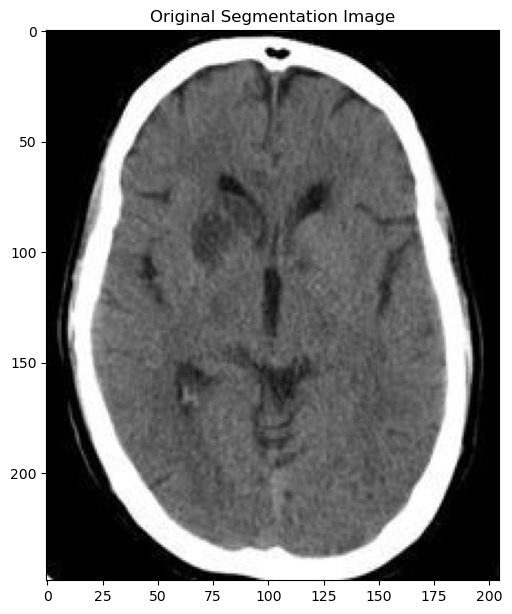

In [5]:
plt.figure(figsize=(50, 50))

plt.subplot(6,1,1); plt.imshow(image, cmap = 'gray')
plt.title("Original Segmentation Image")

In [6]:
# Noise Reduction
# Histogram
# Contrast Streching 
# Normalization
# Gaussian Filter
# Detect low-frequency noise
# CNN Model


Text(0.5, 1.0, 'Image Smoothed Image')

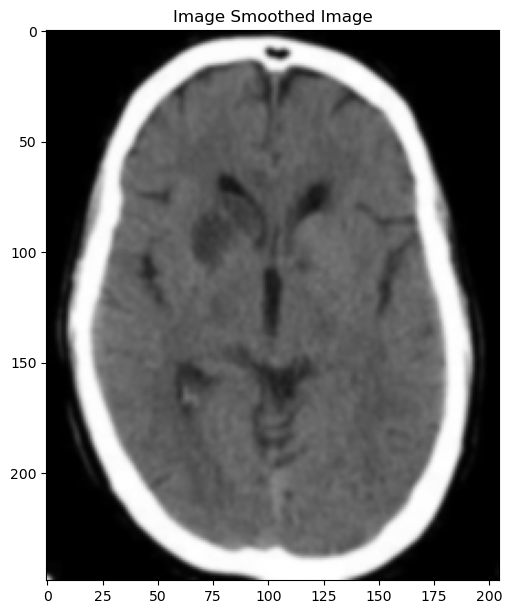

In [10]:
# The Sigma Controls the blurness of the image which reduces the noise
image_smoothed = gaussian_filter(image, sigma=1) 

plt.figure(figsize=(50, 50))

plt.subplot(6,1,1); plt.imshow(image_smoothed, cmap = 'gray')
plt.title("Image Smoothed Image")